<a href="https://colab.research.google.com/github/silvershine157/ML_Practice/blob/master/NNxGM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import matplotlib.pyplot as plt

### Spiral cluster data

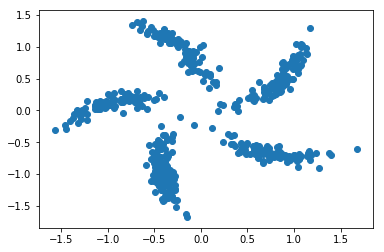

In [8]:
def rotation_matrix_2d(theta):
  R = np.array([
      [np.cos(theta), -np.sin(theta)],
      [np.sin(theta), np.cos(theta)]
  ])
  return R

def generate_spiral_cluster_data(N, spiralness=0.7):
  data = np.zeros((N, 2))
  for n in range(N):
    z = np.random.randint(0, 5) # 0~4
    g = np.random.multivariate_normal([1.0, 0.0], [[0.08, 0.0], [0.0, 0.005]])
    theta = z*np.pi*2/5 + spiralness*np.linalg.norm(g)
    y = np.matmul(rotation_matrix_2d(theta), g)
    data[n, :] = y
  return data

N = 500 # number of data points
data = generate_spiral_cluster_data(N, spiralness=0.5)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

## Preliminary: Inference in graphical models with conjugacy structure

**model**

observation: $y$

latent state: $x$

model parameter: $\theta$

observation model: $p(y | x, \theta)$

latent variable model: $p(x | \theta)$

parameter prior: $p(\theta)$

**variational inference**

mean field family: $q(\theta)q(x)$ (to approximate $p(\theta, x | y)$)

VI objective: $\mathcal{L}[q(\theta) q(x)] = \mathbb{E}_{q(\theta) q(x)}[log{\frac{p(\theta)p(x|\theta)p(y|x,\theta)}{q(\theta)q(x)}}]$

if $p(y | x, \theta)$ is conjugate to $p(x | \theta)$, then for fixed $q(\theta)$, the optimal factor $q^*(x) = argmax_{q(x)}{\mathcal{L}[q(\theta) q(x)]}$ is in the same family where the parameters are simple functions of $y$ and expectation statistics of $q(\theta)$





### Example: Gaussian mixture

**notations**

observation: $y$

latent state (discrete): $z$

model parameters: $\mu_1, ..., \mu_K, \Sigma_1, ..., \Sigma_K, \pi$

data index: $n$

cluster index: $k$

**observation model**

$p(y | z, \mu_1, ..., \mu_K, \Sigma_1, ..., \Sigma_K)
\\= \Pi_n \mathcal{N}(y_n ; \mu_{z_n}, \Sigma_{z_n})$

**latent variable model**

$p(z | \pi) = \Pi_n \pi[z_n]$

**prior**

$p(\pi) = Dir(\pi; \alpha)$

$p(\mu_1, ..., \mu_K, \Sigma_1, ..., \Sigma_K) = \Pi_k NIW(\mu_k, \Sigma_k, \lambda)$



## SVAE

### Neural observation model

**Prior**

$\pi \sim Dir(\alpha)$

$(\mu_k, \Sigma_k) \sim NIW(\lambda)$

$\gamma \sim p(\gamma)$

**Likelihood**

$z_n | \pi \sim^{iid} \pi$

$x_n \sim^{iid} \mathcal{N}(\mu^{(z_n)}, \Sigma^{(z_n)})$

$y_n | x_n, \gamma \sim^{iid} \mathcal{N}(\mu(x_n; \gamma), \Sigma(x_n; \gamma))$